In [54]:
import pandas as pd
import numpy as np
import env

import matplotlib.pyplot as plt
import seaborn as sns

import acquire

In [9]:
zillow = acquire.get_sql_zillow()

- There are duplicate properties (same parcelid) that have multiple transaction dates.
- I'm keeping the observation with the most recent transaction date and drop the previous entries.
    - convert transactiondate to datetime type
    - sort the observations by transactiondate and use `drop_duplicates`, keeping the most recent transaction date

In [18]:
zillow.transactiondate = pd.to_datetime(zillow.transactiondate, format='%Y-%m-%d')
zillow = zillow.sort_values("transactiondate").drop_duplicates('parcelid',keep='last')

Remove properties that do not have a latitude and longitude value.

In [36]:
#Check the nulls in the longitude and latitude.
zillow.longitude.isnull().sum()
zillow.latitude.isnull().sum()

#Both have 33 null observations.
#Check if these nulls are from the same properties
zillow[zillow.longitude.isnull()][["longitude","latitude"]]

zillow.dropna(subset=['longitude','latitude'])

,typeconstructiontypeid,storytypeid,propertylandusetypeid,parcelid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,id,logerror,transactiondate,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,14297519,NaN,NaN,NaN,NaN,1727539,NaN,...,None,None,None,None,0,0.025595,2017-01-01,Single Family Residential,None,None
1,NaN,NaN,261.0,17052889,NaN,NaN,NaN,NaN,1387261,NaN,...,None,None,None,None,1,0.055619,2017-01-01,Single Family Residential,None,None
2,NaN,NaN,261.0,14186244,NaN,NaN,NaN,NaN,11677,NaN,...,None,None,None,None,2,0.005383,2017-01-01,Single Family Residential,None,None
3,NaN,NaN,261.0,12177905,2.0,NaN,NaN,NaN,2288172,NaN,...,None,None,None,Central,3,-0.103410,2017-01-01,Single Family Residential,None,None
4,NaN,NaN,266.0,10887214,2.0,NaN,NaN,1.0,1970746,NaN,...,Central,None,None,Central,4,0.006940,2017-01-01,Condominium,None,None
5,NaN,NaN,266.0,17143294,NaN,NaN,NaN,NaN,1447245,NaN,...,None,None,None,None,5,-0.020526,2017-01-01,Condominium,None,None
6,NaN,NaN,261.0,12095076,2.0,NaN,NaN,1.0,781532,NaN,...,Central,None,None,Central,6,-0.001011,2017-01-01,Single Family Residential,None,None
7,NaN,NaN,261.0,12069064,NaN,NaN,NaN,NaN,870991,NaN,...,None,None,None,None,7,0.101723,2017-01-01,Single Family Residential,None,None
70,NaN,NaN,261.0,11018202,7.0,NaN,NaN,NaN,1061201,NaN,...,None,None,None,Floor/Wall,70,0.021262,2017-01-02,Single Family Residential,None,None
71,NaN,NaN,261.0,10808296,2.0,NaN,NaN,1.0,2655846,NaN,...,Central,None,None,Central,71,0.008475,2017-01-02,Single Family Residential,None,None


### Summary of Data

In [37]:
zillow.describe()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,parcelid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
count,222.000000,50.0,77381.000000,7.741400e+04,49440.000000,15.000000,206.000000,24953.000000,7.741400e+04,50.000000,...,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77414.000000,77414.000000
mean,6.040541,7.0,261.826340,1.300670e+07,3.920510,3.933333,7.388350,1.813289,1.495774e+06,679.720000,...,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,38848.445307,0.016578
std,0.557285,0.0,5.141199,3.480690e+06,3.592779,0.258199,2.734542,2.967894,8.612720e+05,689.703546,...,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,22404.198916,0.170342
min,4.000000,7.0,31.000000,1.071186e+07,1.000000,3.000000,2.000000,1.000000,3.490000e+02,38.000000,...,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,0.000000,-4.655420
25%,6.000000,7.0,261.000000,1.153834e+07,2.000000,4.000000,7.000000,1.000000,7.524398e+05,273.000000,...,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,19459.250000,-0.024387
50%,6.000000,7.0,261.000000,1.253072e+07,2.000000,4.000000,7.000000,1.000000,1.498474e+06,515.000000,...,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,38871.500000,0.006624
75%,6.000000,7.0,266.000000,1.421149e+07,7.000000,4.000000,7.000000,1.000000,2.241722e+06,796.500000,...,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,58254.750000,0.039211
max,13.000000,7.0,275.000000,1.676893e+08,24.000000,4.000000,21.000000,13.000000,2.985182e+06,3560.000000,...,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,77613.000000,5.262999


In [38]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77414 entries, 0 to 77613
Data columns (total 69 columns):
typeconstructiontypeid          222 non-null float64
storytypeid                     50 non-null float64
propertylandusetypeid           77381 non-null float64
parcelid                        77414 non-null int64
heatingorsystemtypeid           49440 non-null float64
buildingclasstypeid             15 non-null float64
architecturalstyletypeid        206 non-null float64
airconditioningtypeid           24953 non-null float64
id                              77414 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77381 non-null float64
bedroomcnt                      77381 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6023 non-null float64
calculatedfinishedsquarefeet   

In [40]:
zillow.shape

(77414, 69)

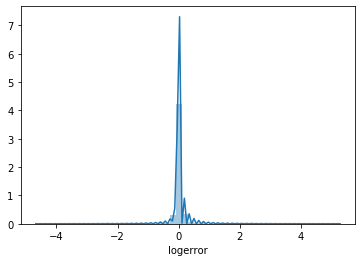

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


ValueError: color kwarg must have one color per data set. 2 data sets and 1 colors were provided

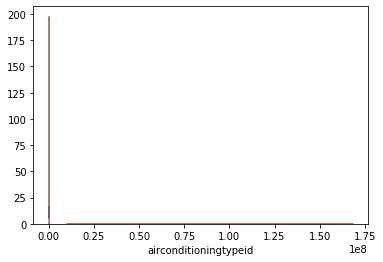

In [66]:
# attributes = [zillow.columns.tolist()]
# n_cols = len(attributes)

# _,ax = plt.subplots(nrows=round(n_cols/4),ncols=4, figsize=(30,30))
                    
for col in zillow.columns:
    sns.distplot(zillow[col].dropna())

<Figure size 1440x720 with 0 Axes>

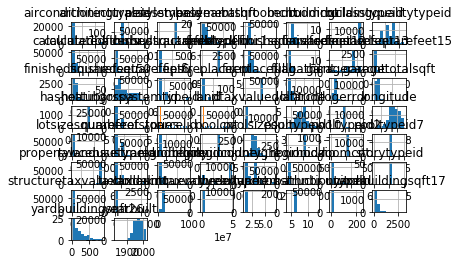

In [47]:
plt.figure(figsize=(20,10))
zillow.hist()
plt.show()

In [ ]:
summary stats, info, dtypes, shape, distributions, value_counts, etc.)

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

what are the typical missing values?

- empty string
- blank space
- NaN

In [78]:
zillow.isnull().sum()

typeconstructiontypeid          77192
storytypeid                     77364
propertylandusetypeid              33
parcelid                            0
heatingorsystemtypeid           27974
buildingclasstypeid             77399
architecturalstyletypeid        77208
airconditioningtypeid           52461
id                                  0
basementsqft                    77364
bathroomcnt                        33
bedroomcnt                         33
buildingqualitytypeid           27742
calculatedbathnbr                 642
decktypeid                      76800
finishedfloor1squarefeet        71391
calculatedfinishedsquarefeet      229
finishedsquarefeet12             3665
finishedsquarefeet13            77373
finishedsquarefeet15            74405
finishedsquarefeet50            71391
finishedsquarefeet6             77028
fips                               33
fireplacecnt                    69138
fullbathcnt                       642
garagecarcnt                    51940
garagetotals

In [140]:
def standardize_missing(df):
    missing = ["", " ", None]
    for col in df.columns:
        df[col] = df[col].replace(missing, np.nan)
    return df
#this is in the acquire.py already

In [144]:
zillow = standardize_missing(zillow)
zillow = handle_missing_values(zillow,0.5,0.75)

In [146]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77226 entries, 0 to 77613
Data columns (total 35 columns):
propertylandusetypeid           77226 non-null float64
parcelid                        77226 non-null int64
heatingorsystemtypeid           49440 non-null float64
id                              77226 non-null int64
bathroomcnt                     77226 non-null float64
bedroomcnt                      77226 non-null float64
buildingqualitytypeid           49672 non-null float64
calculatedbathnbr               76772 non-null float64
calculatedfinishedsquarefeet    77185 non-null float64
finishedsquarefeet12            73749 non-null float64
fips                            77226 non-null float64
fullbathcnt                     76772 non-null float64
latitude                        77226 non-null float64
longitude                       77226 non-null float64
lotsizesquarefeet               69069 non-null float64
propertycountylandusecode       77226 non-null object
propertyzoningde

In [ ]:
threshold = int(rou)

In [136]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df